In [34]:
import easyocr
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from random import sample

In [2]:
# Define paths
license_plate_dir = 'License-Plate-Detection-4'
train_dir = os.path.join(license_plate_dir, 'train')

In [3]:
images=os.listdir(train_dir)
image_path = os.path.join(train_dir,images[10])
image_path

'License-Plate-Detection-4\\train\\OD-01-8785_jpg.rf.01ded6dca7dacd864d672cb8789467a1.jpg'

In [4]:
# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify the languages you need

Detected Text: 0D (Confidence: 0.53)
Detected Text: 0 1 (Confidence: 0.65)
Detected Text: 8785 (Confidence: 1.00)


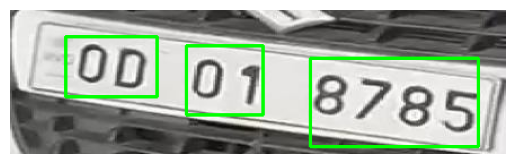

In [5]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (EasyOCR uses RGB format)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use EasyOCR to read text from the image
results = reader.readtext(rgb_image)

# Process and display the results
for (bbox, text, prob) in results:
    print(f"Detected Text: {text} (Confidence: {prob:.2f})")
    
    # Draw bounding boxes on the image (optional)
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    
# Convert BGR image to RGB for displaying with matplotlib
rgb_image_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected text using matplotlib
plt.imshow(rgb_image_with_boxes)
plt.axis('off')
plt.show()

In [6]:
import easyocr
import cv2
import os
from tqdm import tqdm
import pandas as pd

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify the languages you need

# Define paths
license_plate_dir = 'License-Plate-Detection-4'
train_dir = os.path.join(license_plate_dir, 'train')

# Initialize lists to store actual and predicted license plates
actual_plates = []
predicted_plates = []
images_sampled = []
Confidence=[]
# Define valid image extensions
valid_image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}

# List all files in the train directory
image_files = os.listdir(train_dir)

# Process each file
for image_file in tqdm(image_files, desc="Processing images"):
    # Get the file extension
    _, ext = os.path.splitext(image_file)
    
    # Skip non-image files
    if ext.lower() not in valid_image_extensions:
        continue
    
    # Extract actual plate from filename
    actual_plate = image_file.split('_')[0].replace('-', '')
    
    # Full path to the image file
    image_path = os.path.join(train_dir, image_file)
    
    try:
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Warning: Unable to load image: {image_file}")
            continue
        
        # Convert the image from BGR to RGB (EasyOCR uses RGB format)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Use EasyOCR to read text from the image
        results = reader.readtext(rgb_image)
        
        # Collect extracted texts and their confidence scores
        extracted_texts = []
        confidence_scores = []
        
        for (bbox, text, prob) in results:
            extracted_texts.append(text.strip())
            confidence_scores.append(prob)
        
        # Join extracted texts into a single string
        extracted_text = ''.join(extracted_texts)
        
        # Store actual and predicted plates
        actual_plates.append(actual_plate)
        predicted_plates.append(extracted_text)
        Confidence.append(confidence_scores)
        images_sampled.append(image)
    
    except Exception as e:
        print(f"Error processing file {image_file}: {e}")

Processing images: 100%|█████████| 2033/2033 [20:06<00:00,  1.68it/s]


In [ ]:
import easyocr
import cv2
import os
from tqdm import tqdm
import pandas as pd
import re

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify the languages you need

# Define paths
license_plate_dir = 'License-Plate-Detection-4'
train_dir = os.path.join(license_plate_dir, 'train')

# Initialize lists to store actual and predicted license plates
actual_plates = []
predicted_plates = []
images_sampled = []

# Define valid image extensions
valid_image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}

# List all files in the train directory
image_files = os.listdir(train_dir)

# Process each file
for image_file in tqdm(image_files, desc="Processing images"):
    # Get the file extension
    _, ext = os.path.splitext(image_file)
    
    # Skip non-image files
    if ext.lower() not in valid_image_extensions:
        continue
    
    # Extract actual plate from filename
    actual_plate = image_file.split('_')[0].replace('-', '')
    
    # Full path to the image file
    image_path = os.path.join(train_dir, image_file)
    
    try:
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Warning: Unable to load image: {image_file}")
            continue
        
        # Convert the image from BGR to RGB (EasyOCR uses RGB format)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Use EasyOCR to read text from the image
        results = reader.readtext(rgb_image)
        
        # Collect extracted texts and their confidence scores
        extracted_texts = []
        confidence_scores = []
        
        for (bbox, text, prob) in results:
            # Clean text: remove special characters, spaces, and convert to uppercase
            cleaned_text = re.sub(r'[^A-Z0-9]', '', text.strip().upper())
            extracted_texts.append(cleaned_text)
            confidence_scores.append(prob)
        
        # Join extracted texts into a single string
        extracted_text = ''.join(extracted_texts)
        
        # Store actual and predicted plates
        actual_plates.append(actual_plate)
        predicted_plates.append(extracted_text)
        images_sampled.append(image)
    
    except Exception as e:
        print(f"Error processing file {image_file}: {e}")

In [7]:
# Create a DataFrame to save the results
results_df = pd.DataFrame({
    'image':images_sampled,
    'Actual Plate': actual_plates,
    'Predicted Plate': predicted_plates,
    'Confidence Scores':Confidence
})

# Save the results to a CSV file
results_df.to_csv('license_plate_extraction_results_by_EASYOCR.csv', index=False)
results_df.head()

,image,Actual Plate,Predicted Plate,Confidence Scores
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",NL01N6706,HLI0146706,"[0.4100098463349429, 0.7615936784016182]"
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",NL01N6706,NL30146706,"[0.5812078515416506, 0.2629573345184326, 0.438..."
2,"[[[63, 63, 63], [63, 63, 63], [63, 63, 63], [6...",NL01N6706,#LI07H5706,"[0.1742132464455799, 0.24682871448429686]"
3,"[[[25, 25, 25], [25, 25, 25], [26, 26, 26], [2...",NL01N8455,AL0 738455,"[0.435730882955818, 0.2904392126820652, 0.3170..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",NL01N8455,"29 #JMe""","[0.5274386405944824, 0.5978704017192576, 0.108..."


In [23]:
results_df['Predicted Plate']=[''.join(result.split()) for result in results_df['Predicted Plate']]

In [25]:
correct =results_df[results_df['Actual Plate']==results_df['Predicted Plate']]

accuracy= (correct.shape[0]/results_df.shape[0])*100
print(f"Accuracy: {accuracy:.2f}%")

(20, 4)

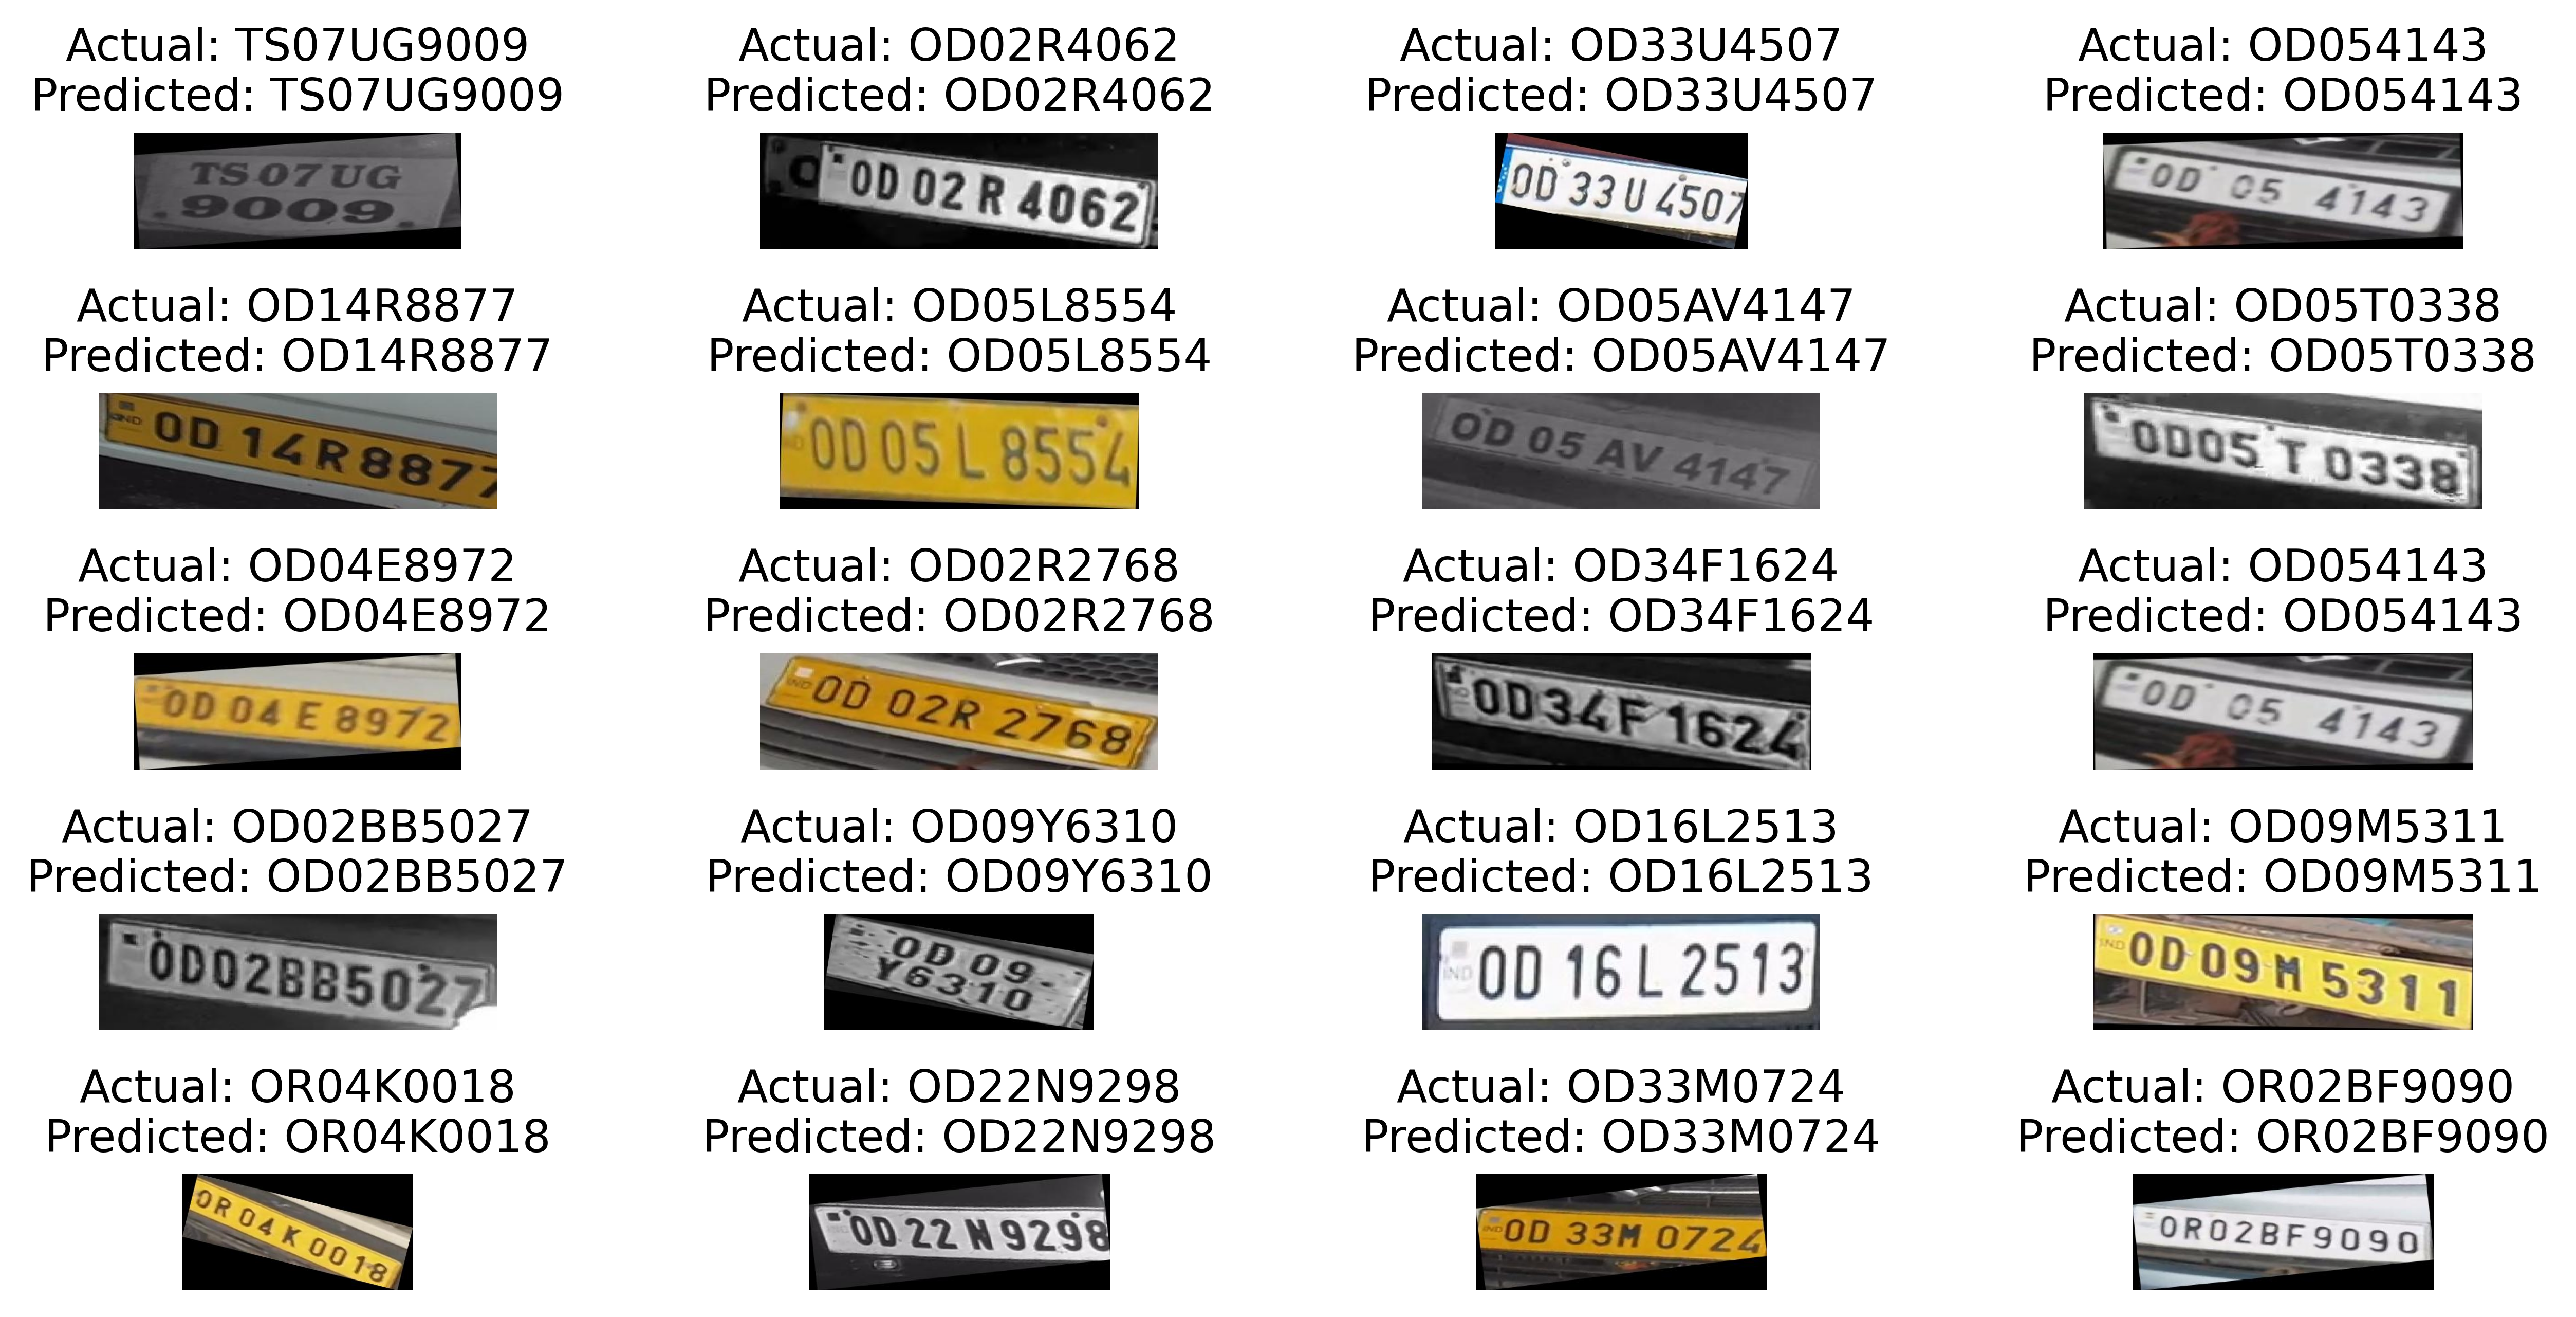

In [43]:
# Filter correct predictions
correct_predictions = results_df[results_df['Actual Plate'] == results_df['Predicted Plate']]

# Prepare data for plotting
correct_samples = list(zip(correct_predictions['image'], 
                           correct_predictions['Actual Plate'], 
                           correct_predictions['Predicted Plate']))

# Sample 50 correct predictions
sampled_correct_samples = sample(correct_samples, min(20, len(correct_samples)))

# Plot the results using matplotlib
fig, axes = plt.subplots(5, 4, figsize=(10,5), dpi=523)  
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(sampled_correct_samples):
        image, actual, predicted = sampled_correct_samples[i]
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Actual: {actual}\nPredicted: {predicted}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('sample.jpeg')
plt.show()